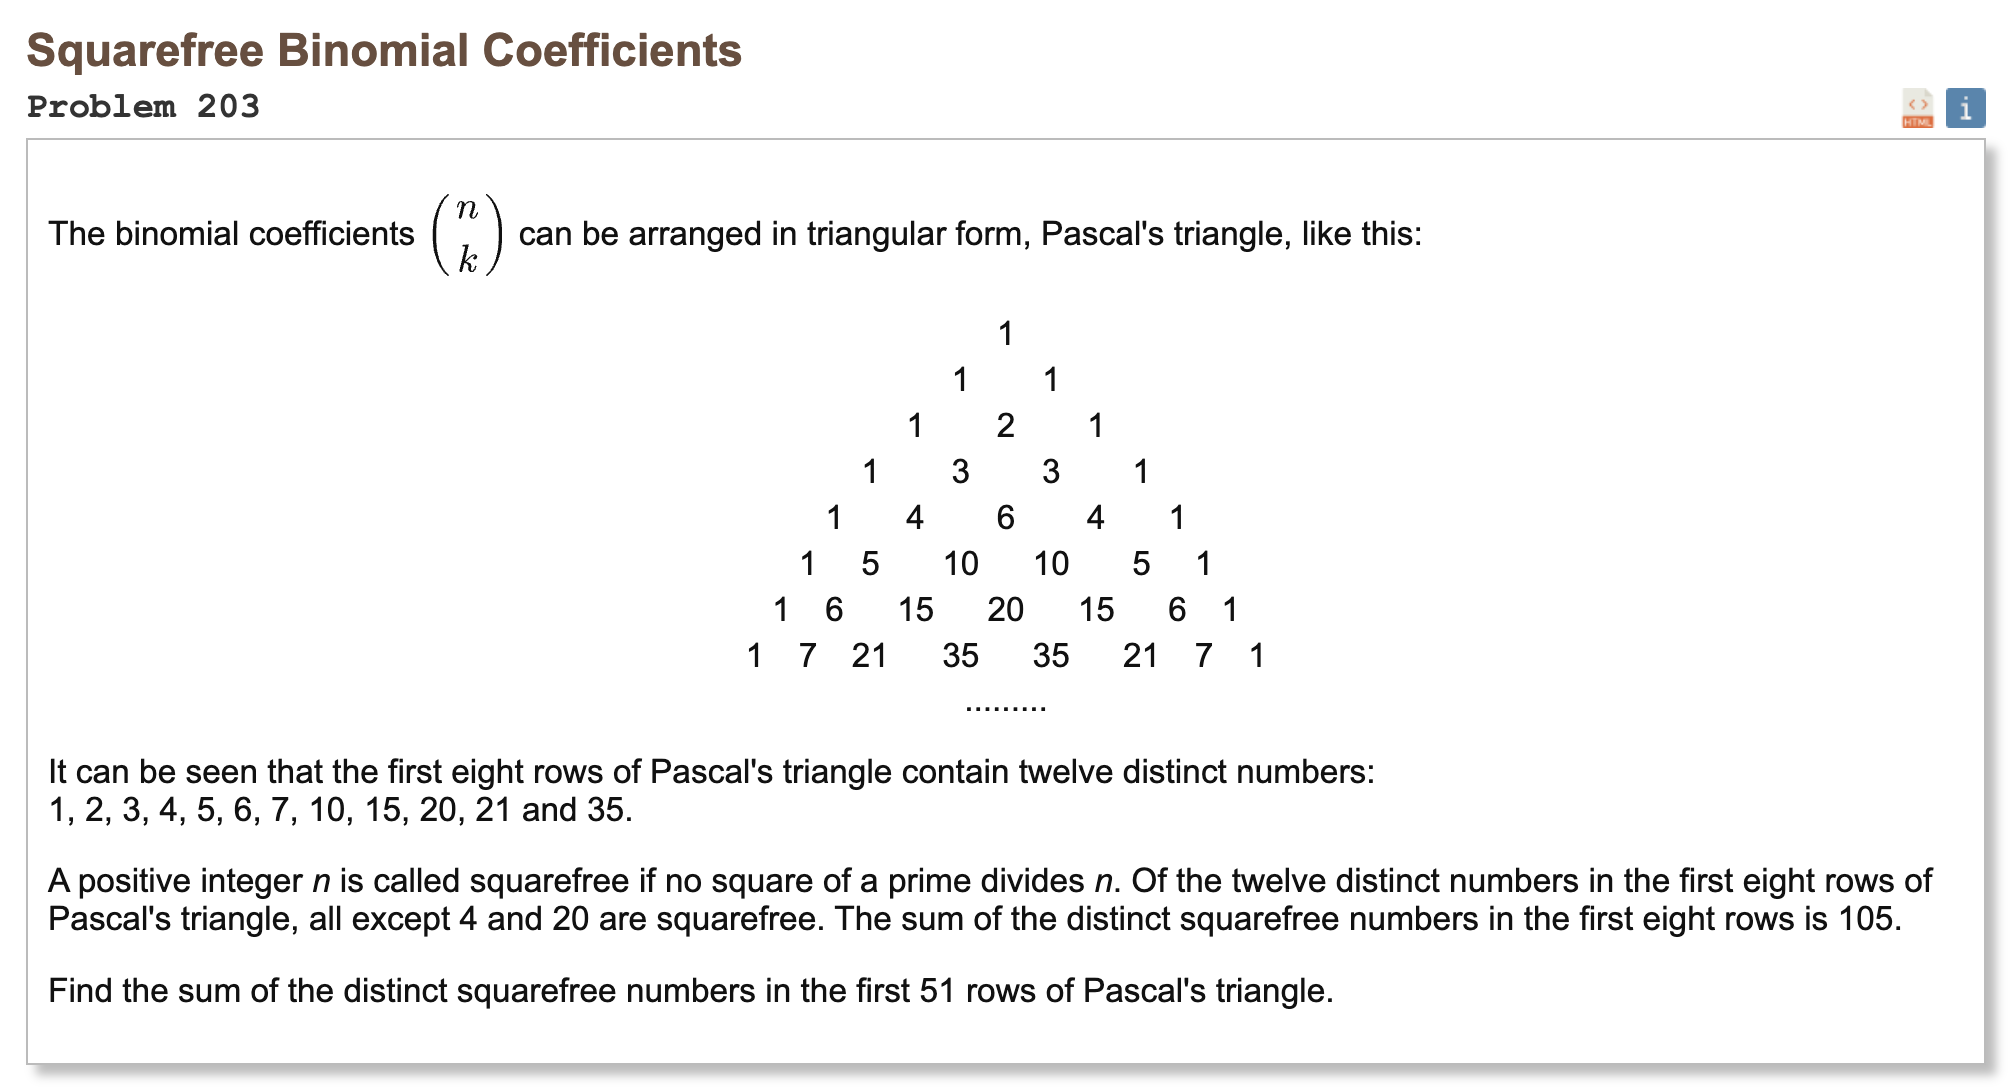

## Initial approach

* build pascals triangle up to row 51 and collect all distinct binomial coefficients you see
* to test if a value is squarefree, check whether any prime square divides it
* you can generate primes up to sqrt(max_value) because larger primes cannot have their square dividing the number
* the largest coefficient in row 51 is choose(50,25), so compute that once to set the prime limit
* for each distinct coefficient, divide by pp when possible, if any pp divides it then it is not squarefree
* sum only the distinct values that pass the squarefree test

In [1]:
import math

def sieve(n):
    bs = bytearray(b"\x01") * (n + 1)
    bs[0:2] = b"\x00\x00"
    r = int(n ** 0.5)
    for p in range(2, r + 1):
        if bs[p]:
            start = p * p
            step = p
            bs[start:n + 1:step] = b"\x00" * (((n - start) // step) + 1)
    return [i for i in range(n + 1) if bs[i]]

def nCk(n, k):
    if k < 0 or k > n:
        return 0
    k = min(k, n - k)
    num = 1
    den = 1
    for i in range(1, k + 1):
        num *= n - k + i
        den *= i
        g = math.gcd(num, den)
        num //= g
        den //= g
    return num // den

def squarefree(n, primes):
    for p in primes:
        pp = p * p
        if pp > n:
            break
        if n % pp == 0:
            return False
    return True

def solve():
    rows = 51
    seen = set()
    for n in range(rows):
        c = 1
        seen.add(c)
        for k in range(1, n + 1):
            c = c * (n - k + 1) // k
            seen.add(c)

    max_val = nCk(rows - 1, (rows - 1) // 2)
    primes = sieve(int(math.isqrt(max_val)) + 1)

    total = 0
    for v in seen:
        if squarefree(v, primes):
            total += v
    return total

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 34029210557338
CPU times: user 372 ms, sys: 12.7 ms, total: 385 ms
Wall time: 384 ms
